In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") #seaborn, ggplot, fivethirtyeight
# set the default size of all figures
plt.rcParams['figure.figsize'] = (13, 8)

In [2]:
df = pd.read_csv(r"E:\documents\Coding\zor practice\DataSet\consumer_complaints.csv")

# Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 777959 non-null  object
 1   product                       777959 non-null  object
 2   sub_product                   542822 non-null  object
 3   issue                         777959 non-null  object
 4   sub_issue                     320986 non-null  object
 5   consumer_complaint_narrative  157865 non-null  object
 6   company_public_response       197884 non-null  object
 7   company                       777959 non-null  object
 8   state                         772056 non-null  object
 9   zip_code                      772001 non-null  object
 10  tags                          109264 non-null  object
 11  consumer_consent_provided     288311 non-null  object
 12  submitted_via                 777959 non-null  object
 13 

In [4]:
df.shape

(777959, 18)

# Data Cleaning

### Handle Missing Data

In [5]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     235137
issue                                0
sub_issue                       456973
consumer_complaint_narrative    620094
company_public_response         580075
company                              0
state                             5903
zip_code                          5958
tags                            668695
consumer_consent_provided       489648
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed                 9545
complaint_id                         0
dtype: int64

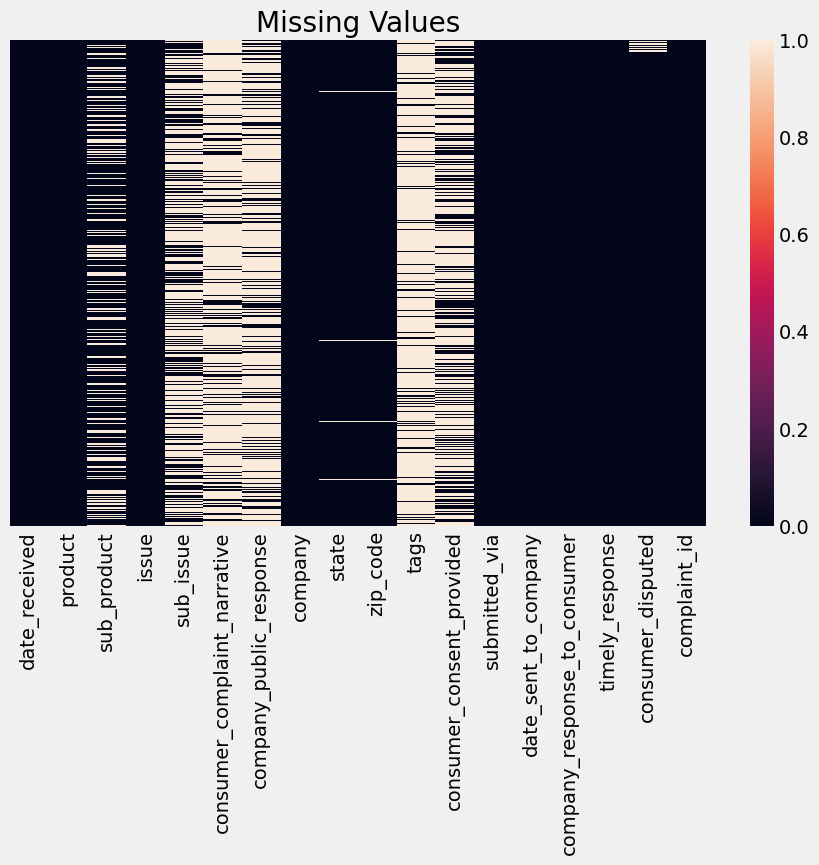

In [6]:
# Display a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Missing Values")
plt.show()


##### Removing columns 

In [7]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [8]:
df.drop(columns= [
    'sub_issue', 'sub_product', 'consumer_complaint_narrative', 'company_public_response', 
    'tags', 'consumer_consent_provided'
], inplace=True)


In [9]:
df.isnull().sum()

date_received                      0
product                            0
issue                              0
company                            0
state                           5903
zip_code                        5958
submitted_via                      0
date_sent_to_company               0
company_response_to_consumer       0
timely_response                    0
consumer_disputed               9545
complaint_id                       0
dtype: int64

In [10]:
# Removing all null values
df = df.dropna()

- we will drop the rest of null values because it's not that much with respect to our data

In [11]:
# checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762734 entries, 0 to 777958
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 762734 non-null  object
 1   product                       762734 non-null  object
 2   issue                         762734 non-null  object
 3   company                       762734 non-null  object
 4   state                         762734 non-null  object
 5   zip_code                      762734 non-null  object
 6   submitted_via                 762734 non-null  object
 7   date_sent_to_company          762734 non-null  object
 8   company_response_to_consumer  762734 non-null  object
 9   timely_response               762734 non-null  bool  
 10  consumer_disputed             762734 non-null  object
 11  complaint_id                  762734 non-null  int64 
dtypes: bool(1), int64(1), object(10)
memory usage: 70.6+ MB


In [13]:
df.isnull().sum()/ len(df)*100

date_received                   0.0
product                         0.0
issue                           0.0
company                         0.0
state                           0.0
zip_code                        0.0
submitted_via                   0.0
date_sent_to_company            0.0
company_response_to_consumer    0.0
timely_response                 0.0
consumer_disputed               0.0
complaint_id                    0.0
dtype: float64

In [14]:
# it use to reset dataset index 
df= df.reset_index(drop=True)

In [15]:
# change the title word first letter to upper case
df.columns = df.columns.str.title()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762734 entries, 0 to 762733
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date_Received                 762734 non-null  object
 1   Product                       762734 non-null  object
 2   Issue                         762734 non-null  object
 3   Company                       762734 non-null  object
 4   State                         762734 non-null  object
 5   Zip_Code                      762734 non-null  object
 6   Submitted_Via                 762734 non-null  object
 7   Date_Sent_To_Company          762734 non-null  object
 8   Company_Response_To_Consumer  762734 non-null  object
 9   Timely_Response               762734 non-null  bool  
 10  Consumer_Disputed             762734 non-null  object
 11  Complaint_Id                  762734 non-null  int64 
dtypes: bool(1), int64(1), object(10)
memory usage: 64.7+ MB


In [17]:

# To change dytpes of date columns
df['Date_Sent_To_Company'] = pd.to_datetime(df['Date_Sent_To_Company'])
df['Date_Received'] = pd.to_datetime(df['Date_Received'])


* There was some null values in other columns too and i drop them and reset the index

* I also change the first letters in columns to upper case

* And i change the dtypes of date columns to datetime

* so First i clean the data and than i prepare it for vizulization

In [18]:
df.head()

,Date_Received,Product,Issue,Company,State,Zip_Code,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed,Complaint_Id
0,2017-03-21,Credit reporting,Incorrect information on credit report,EXPERIAN DELAWARE GP,TX,77075,Phone,2017-03-21,Closed with non-monetary relief,True,No,2397100
1,2017-04-19,Debt collection,Disclosure verification of debt,"Security Credit Services, LLC",IL,60643,Web,2017-04-20,Closed with explanation,True,No,2441777
2,2017-04-19,Credit card,Other,"CITIBANK, N.A.",IL,62025,Referral,2017-04-20,Closed with explanation,True,No,2441830
3,2017-04-14,Mortgage,"Loan modification,collection,foreclosure","Shellpoint Partners, LLC",CA,90305,Referral,2017-04-14,Closed with explanation,True,No,2436165
4,2017-04-19,Credit card,Credit determination,U.S. BANCORP,LA,70571,Postal mail,2017-04-21,Closed with explanation,True,No,2441726


## Complaints Submitted via 

In [19]:
df.groupby('Submitted_Via')['Complaint_Id'].count()

Submitted_Via
Email             301
Fax             10573
Phone           50925
Postal mail     48068
Referral       131220
Web            521647
Name: Complaint_Id, dtype: int64

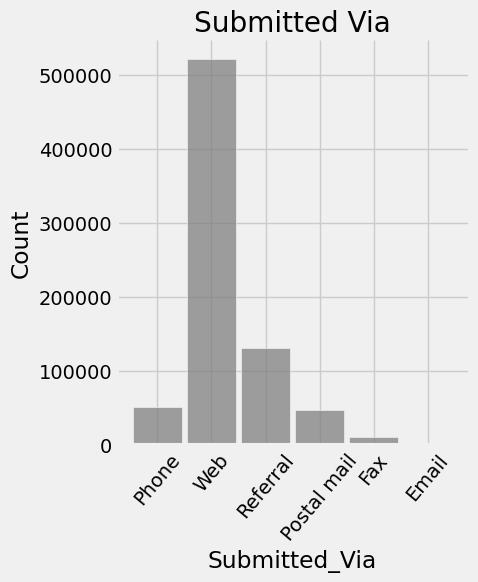

In [20]:
sns.displot(df, x ='Submitted_Via', color = 'grey', 
            #discrete= True
            shrink=.9,)

plt.title('Submitted Via')
plt.xticks(rotation=50)

plt.show()

## The list of companies with High complaints rate

C:\Users\JASIM\AppData\Local\Temp\ipykernel_42552\3906936795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


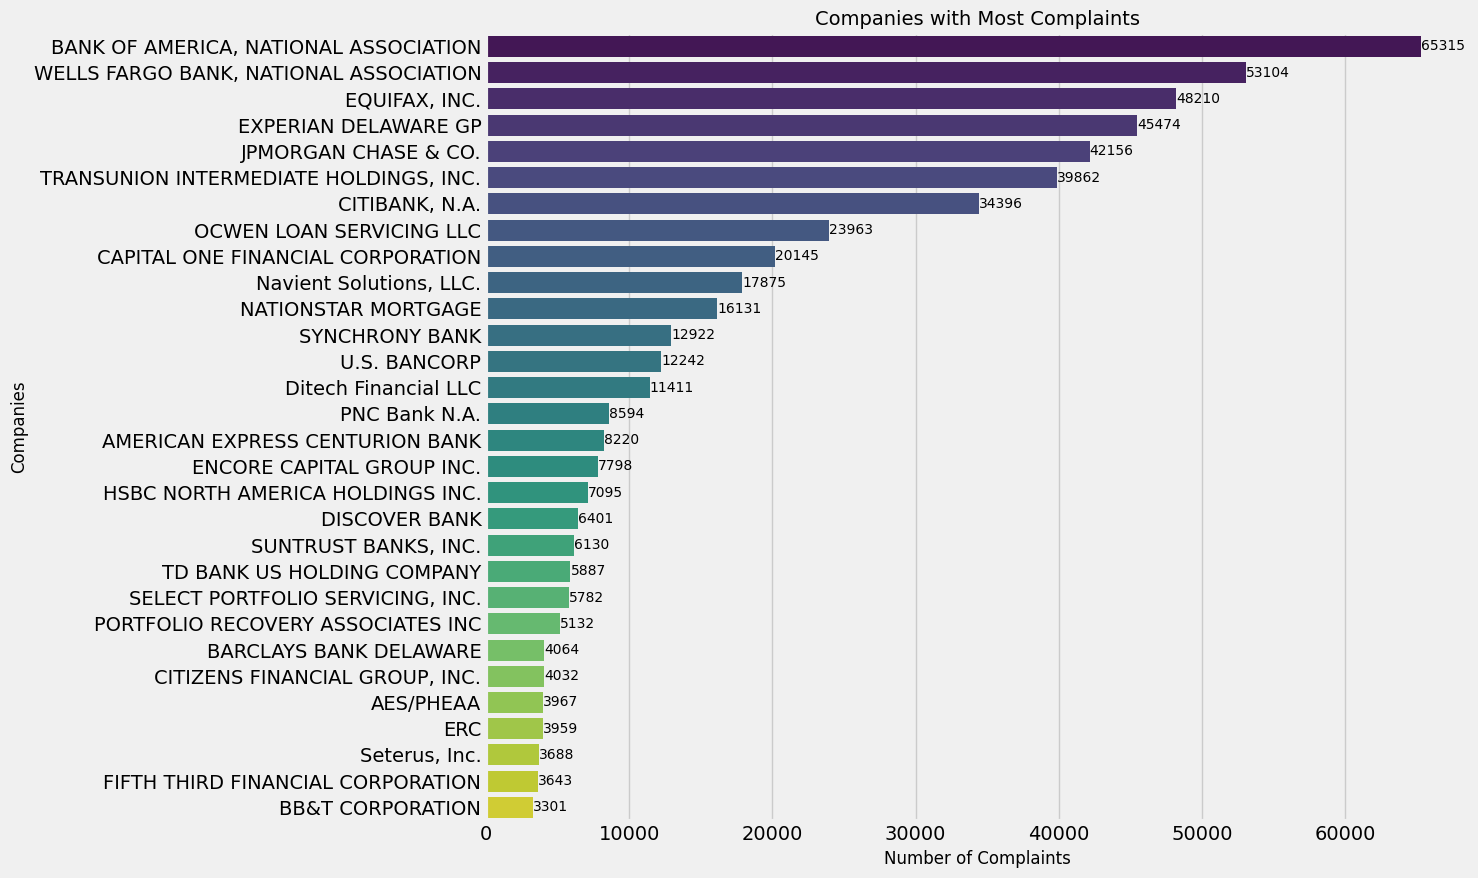

In [49]:
companies_withmore_complaint = df.groupby('Company')['Complaint_Id'].count().sort_values(ascending=False)[:30]

colors = sns.color_palette("viridis", len(companies_withmore_complaint))

plt.figure(figsize=(15, 9))
sns.barplot(
    y=companies_withmore_complaint.index,
    x=companies_withmore_complaint.values,
    palette=colors,
    orient='h'
)

plt.xlabel("Number of Complaints", fontsize=12)
plt.ylabel("Companies", fontsize=12)
plt.title('Companies with Most Complaints', fontsize=14)

for i, v in enumerate(companies_withmore_complaint.values):
    plt.text(v, i, str(v), color='black', fontsize=10, va='center')

plt.tight_layout()
plt.show()


## The Product that people get problem about?

In [125]:
df['Product'].value_counts()

Product
Mortgage                   225394
Debt collection            145071
Credit reporting           139929
Credit card                 88471
Bank account or service     84643
Student loan                32315
Consumer Loan               31411
Payday loan                  5523
Money transfers              5155
Prepaid card                 3774
Other financial service      1031
Virtual currency               17
Name: count, dtype: int64

<Axes: ylabel='Product'>

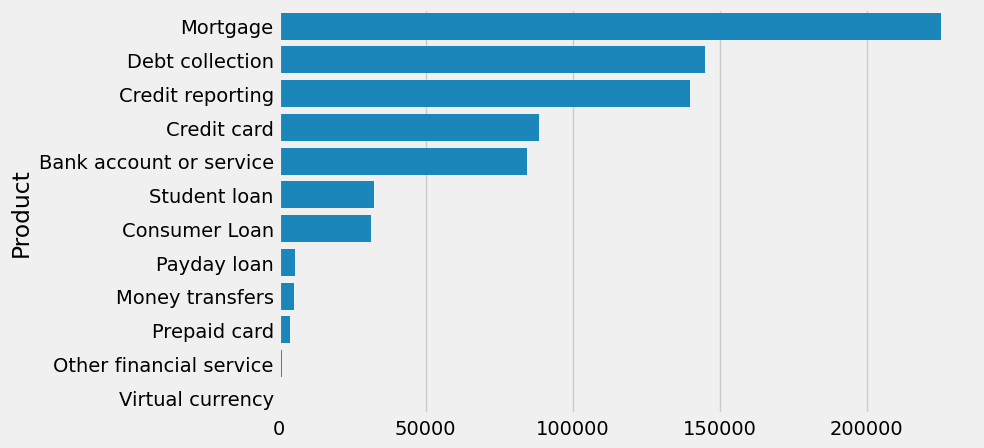

In [35]:
plt.figure(figsize=(8,5))
product_count = df['Product'].value_counts()

sns.barplot(x= product_count.values, y= product_count.index)

* Mortgage is the top product with more than 200000 
* Virtual Currency less than 50 

In [28]:
df['Year_Received'] = df['Date_Received'].dt.year
df['Month_Received'] = df['Date_Received'].dt.month

## Which states have the highest and lowest number of consumer complaints?

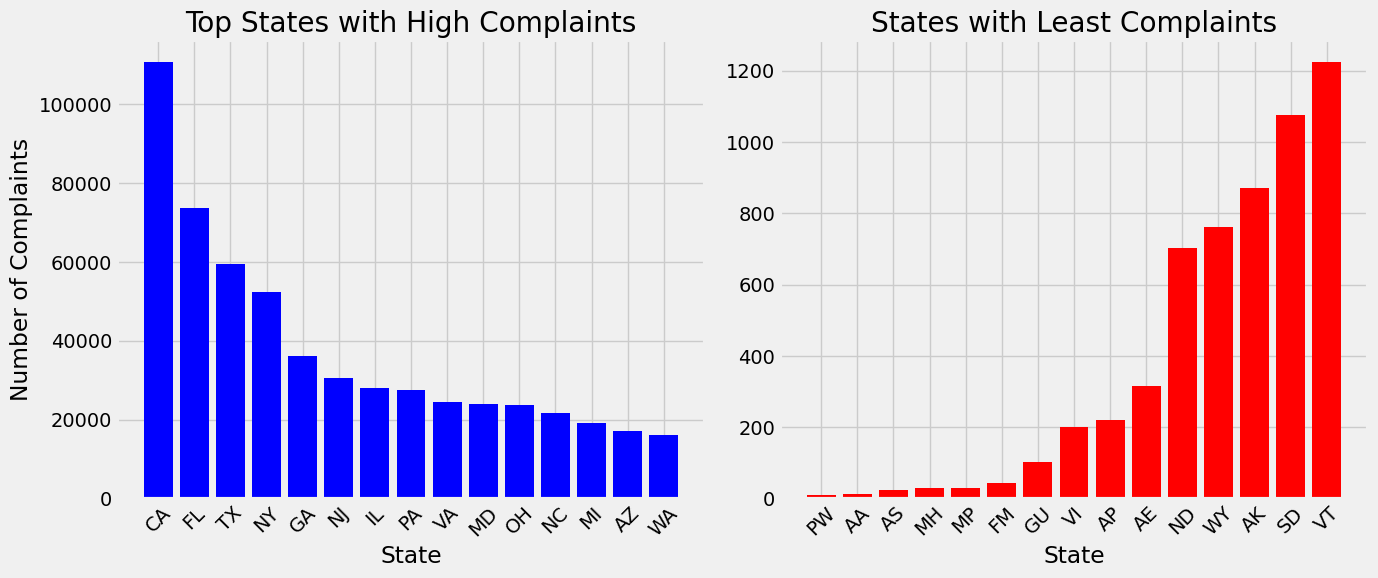

In [30]:
import matplotlib.pyplot as plt

sate_complaint = df.groupby('State')['Complaint_Id'].count()

top_states = sate_complaint.sort_values(ascending=False)[:15]
bottom_states = sate_complaint.sort_values(ascending=True)[:15]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for states with the highest complaints
axes[0].bar(top_states.index, top_states.values, color='blue')
axes[0].set_title('Top States with High Complaints')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Complaints')
axes[0].tick_params(axis='x', rotation=45)

# Plot for states with the least complaints
axes[1].bar(bottom_states.index, bottom_states.values, color='red')
axes[1].set_title('States with Least Complaints')
axes[1].set_xlabel('State')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## The issue that companies get the most

In [75]:
most_issue_company = df.groupby('Company')['Issue']\
    .value_counts().sort_values(ascending=False)

most_issue_company[:10]

Company                                 Issue                                   
EQUIFAX, INC.                           Incorrect information on credit report      34345
EXPERIAN DELAWARE GP                    Incorrect information on credit report      32385
TRANSUNION INTERMEDIATE HOLDINGS, INC.  Incorrect information on credit report      30236
BANK OF AMERICA, NATIONAL ASSOCIATION   Loan modification,collection,foreclosure    24909
WELLS FARGO BANK, NATIONAL ASSOCIATION  Loan modification,collection,foreclosure    17205
OCWEN LOAN SERVICING LLC                Loan modification,collection,foreclosure    11000
JPMORGAN CHASE & CO.                    Loan modification,collection,foreclosure     9667
OCWEN LOAN SERVICING LLC                Loan servicing, payments, escrow account     9614
BANK OF AMERICA, NATIONAL ASSOCIATION   Loan servicing, payments, escrow account     9241
Navient Solutions, LLC.                 Dealing with my lender or servicer           8501
Name: count, dtype:

## Are there any patterns in the timing of consumer complaints? For example, are there any particular months or days of the week that have higher complaint rates?

In [24]:

df[df['Year_Received'] == 2017]

Complaint_date = df.groupby('Year_Received')['Complaint_Id'].count()
Complaint_date


Year_Received
2011      2521
2012     71755
2013    107160
2014    152044
2015    167379
2016    190207
2017     71668
Name: Complaint_Id, dtype: int64

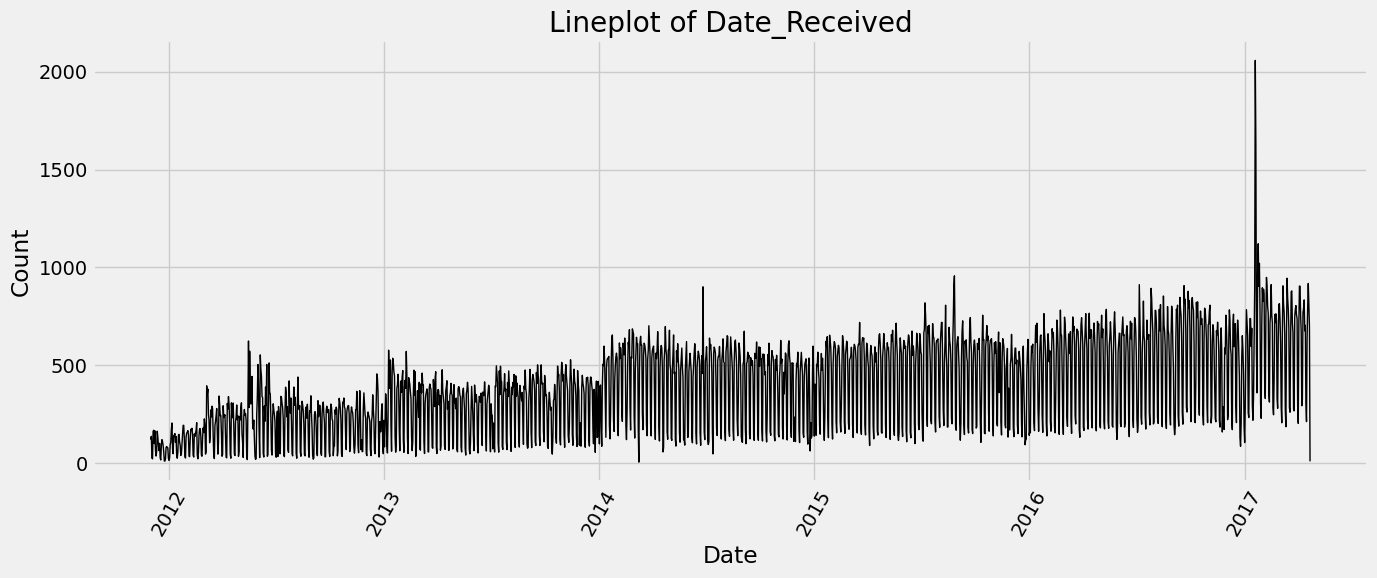

In [64]:
# Aggregate data by date (e.g., count occurrences per date)
date_counts = df['Date_Received'].value_counts().sort_index()

# Plot the lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values, color='k', linewidth=1)
plt.title('Lineplot of Date_Received')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


*This clearly indicates that the complaints rate were reported more and more each year but one thing is clear that not alll the companies would be same i mean some companies might be different in increasisng the rate of coompaints and some might receive less than thier previous years* 

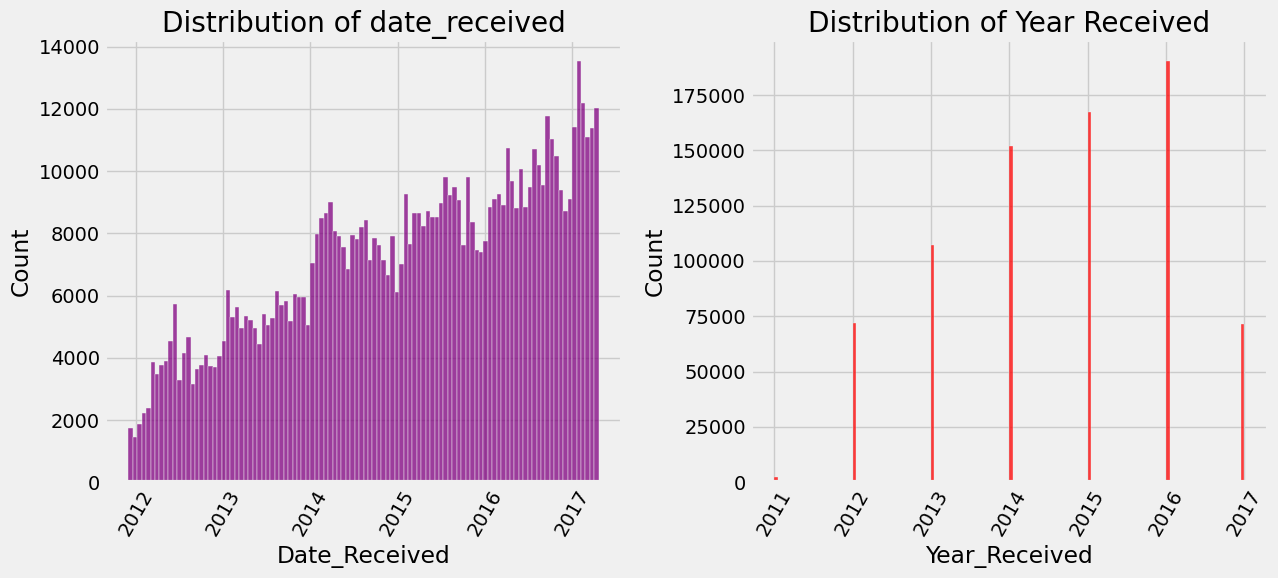

In [108]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(1,2, figsize=(13,6))

# Plot the first distribution
sns.histplot(df['Date_Received'], color='purple', ax=axes[0])
axes[0].set_title('Distribution of date_received')
axes[0].tick_params(axis='x', rotation=60)

# Plot the second distribution
sns.histplot(df['Year_Received'], color='red', ax=axes[1])
axes[1].set_title('Distribution of Year Received')
axes[1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

C:\Users\JASIM\AppData\Local\Temp\ipykernel_32592\679211983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date_Received'] = pd.to_datetime(filtered_df['Date_Received'])


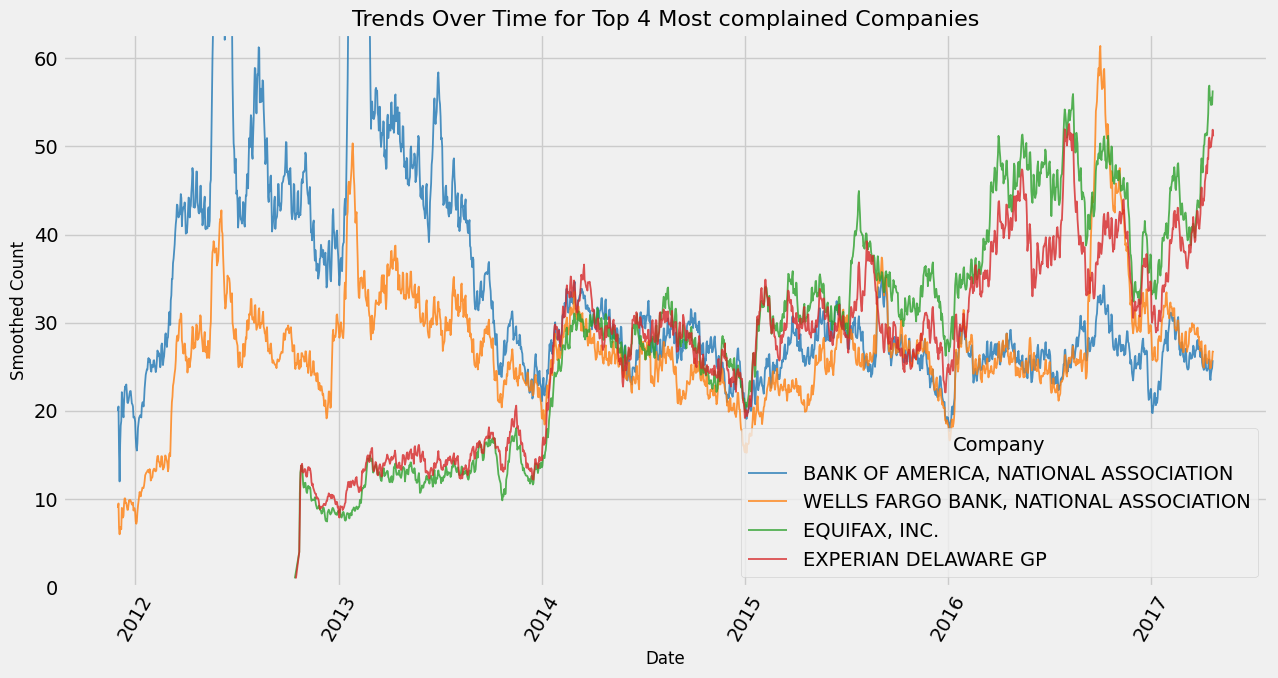

In [120]:
top10_companies = df['Company'].value_counts().index[:4]
#top10_companies = df['Company'].value_counts().index[4:8]

# Filter the original DataFrame for these top 4 companiesss
filtered_df = df[df['Company'].isin(top10_companies)]

# Ensure 'Date_Received' is in datetime format
filtered_df['Date_Received'] = pd.to_datetime(filtered_df['Date_Received'])

# Group data by 'Date_Received' and 'Company', and count occurrences
grouped = filtered_df.groupby(['Date_Received', 'Company']).size().reset_index(name='Count')

# Smooth data using rolling mean (e.g., 7-day window)
grouped['Smoothed_Count'] = grouped.groupby('Company')['Count'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())

plt.figure(figsize=(13, 7))
sns.lineplot(data=grouped, x='Date_Received', y='Smoothed_Count', hue='Company', palette='tab10', linewidth=1.3, alpha=0.8)

plt.title('Trends Over Time for Top 4 Most complained Companies', fontsize=16)
#plt.title('Trends Over Time for the last 4 out of top(8) Most complained Companies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Smoothed Count', fontsize=12)
plt.ylim(0, grouped['Smoothed_Count'].quantile(0.99))  # Limit y-axis to the 99th percentile to handle extreme outliers
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

*Like as yoou can see iin this graph that some companies has higher complaints rate in 2010 such as bank of america that there compaint rate getting better each year which indicates they worked hard to fix the problem mosty butt EQIFAX their complaints rate getting worse each year*